# Atividade 02
Nesta atividade vocês deverão escolher e analisar uma série temporal no Python. Vocês podem pesquisar a série temporal em bases de dados específicas de suas pesquisas ou no Zenodo.

1. Criar um arquivo no Jupyter específico da atividade, com nome "Atividade_02". Você deverá desenvolver os próximos passos neste arquivo;
2. Importar sua série temporal utilizando o pandas;


In [1]:
#Importar sua série temporal utilizando o pandas
import pandas as pd
df = pd.read_csv(r"C:\Users\BiaBN\OneDrive\Documentos\ENS410064\Dados\ES_planilhacompleta.csv",encoding='latin1')
df

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_18664\2674876724.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\BiaBN\OneDrive\Documentos\ENS410064\Dados\ES_planilhacompleta.csv",encoding='latin1')


,Ano,Mes,Dia,Hora,Minuto,Estacao,Estacao.1,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Laranjeiras,ES_001,O3,29.89,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Laranjeiras,ES_001,O3,26.2,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Laranjeiras,ES_001,O3,20.27,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Laranjeiras,ES_001,O3,23.22,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Laranjeiras,ES_001,O3,21.53,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
919795,2023,12,31,19,30,EMQAr-Sul 6 - Anchieta Centro,ES_015,CO,416.86,ug/m3,Automatica,Referencia
919796,2023,12,31,20,30,EMQAr-Sul 6 - Anchieta Centro,ES_015,CO,418.5,ug/m3,Automatica,Referencia
919797,2023,12,31,21,30,EMQAr-Sul 6 - Anchieta Centro,ES_015,CO,406.08,ug/m3,Automatica,Referencia
919798,2023,12,31,22,30,EMQAr-Sul 6 - Anchieta Centro,ES_015,CO,398.83,ug/m3,Automatica,Referencia


In [50]:
#filtrar dados para ES_001 de O3
filtred_o3_df = df.loc[
    (df['Poluente'] == 'CO') & # Filtrando apenas poluentes em SO2
    (df['Estacao.1'] == 'ES_001')  # Filtrando apenas a estação ES_001
]
#transformando a coluna Valor em float
filtred_o3_df['Valor'] = filtred_o3_df['Valor'].astype('float')
filtred_o3_df.dtypes

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_18664\1160992122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_o3_df['Valor'] = filtred_o3_df['Valor'].astype('float')


Ano            int64
Mes            int64
Dia            int64
Hora           int64
Minuto         int64
Estacao       object
Estacao.1     object
Poluente      object
Valor        float64
Unidade       object
Tipo          object
Testacao      object
dtype: object

In [53]:
#filtrar os valores negativos
filtred_o3_df = filtred_o3_df.loc[(filtred_o3_df['Valor'] >= 0)]

# Formatando data e adicionando ao índice
from datetime import datetime
filtred_o3_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

# Colocando a coluna "Data" como índice
filtred_o3_df = filtred_o3_df.set_index('Date')

# Selecionando somente os dados importantes para minha análise
filtred_o3_df = filtred_o3_df[['Valor', 'Unidade', 'Tipo', 'Testacao']]
filtred_o3_df

,Valor,Unidade,Tipo,Testacao
Date,,,,
2023-01-01 00:30:00,404.46,ug/m3,Automatica,Referencia
2023-01-01 01:30:00,349.75,ug/m3,Automatica,Referencia
2023-01-01 02:30:00,391.11,ug/m3,Automatica,Referencia
2023-01-01 03:30:00,307.83,ug/m3,Automatica,Referencia
2023-01-01 04:30:00,262.65,ug/m3,Automatica,Referencia
...,...,...,...,...
2023-12-31 19:30:00,429.42,ug/m3,Automatica,Referencia
2023-12-31 20:30:00,486.51,ug/m3,Automatica,Referencia
2023-12-31 21:30:00,470.62,ug/m3,Automatica,Referencia


3. Usar o método "describe" para analisar as estatísticas de sua série de dados e responder as seguintes perguntas: (a) Qual a média da sua série de dados? (b) Qual o valor do meio (percentil 50%)? (c) Qual a faixa de valores entre os percentis 25% e 75%?

In [54]:
#analisando a estatistica
filtred_o3_df.describe()

,Valor
count,8293.000000
mean,393.374981
std,307.420851
min,16.570000
25%,192.840000
50%,312.010000
75%,495.230000
max,3396.730000


(a) A média da série de dados é 393.374981 <br>
(b) O valor do meio é 312.010000 <br>
(c) A faixa de valores é de 192.840000 até 495.230000

In [55]:
!pip install matplotlib

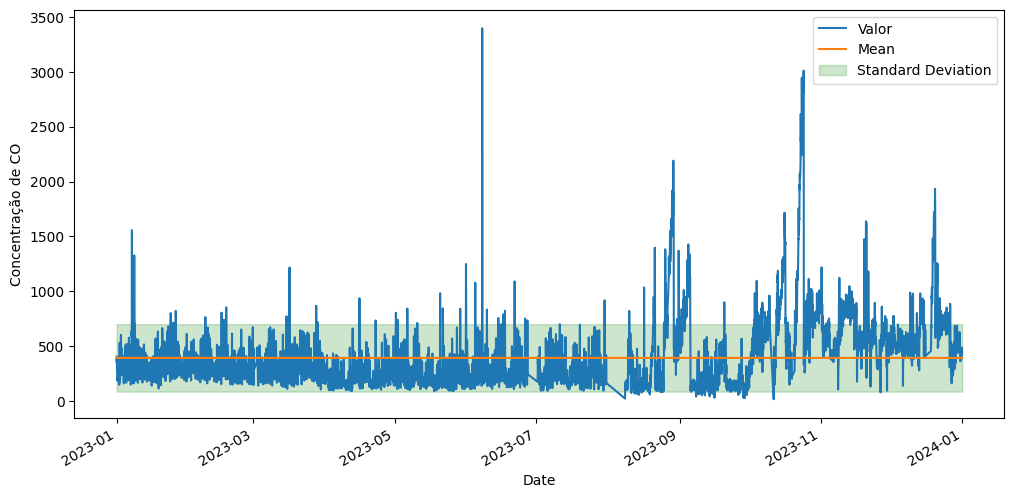

In [57]:
# Importando patches para adicionar item de legenda
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# Plotando dados válidos e adicionando o eixo de plotagem a uma variável
ax = filtred_o3_df['Valor'].plot(ylabel='Concentração de CO')

# Plotando a área do desvio padrão
mean = filtred_o3_df['Valor'].mean()
std = filtred_o3_df['Valor'].std()
number_elements = len(filtred_o3_df['Valor'])

ax.fill_between(
    filtred_o3_df.index, number_elements * [mean - std], number_elements * [mean + std],
    color='green', alpha=.2)

# Pegando um valor médio
mean_df = filtred_o3_df[['Valor']].copy()
mean_df.loc[:, 'Mean'] = mean
mean_df = mean_df[['Mean']]
mean_df.plot(ax=ax)

# Adicionando Standard Deviation na legenda
std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = ax.get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
ax.legend(handles, labels)

plt.show()